# Sección 15: Tasas Relacionadas y Problemas de Aplicación

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, Eq, solve, pi, sqrt

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Problemas de Globos y Esferas

**Fórmula clave**: Para un globo esférico, el volumen $V$ y el radio $r$ están relacionados por:
$$V = \frac{4}{3}\pi r^3$$

### Implementación con ejemplo de globo inflándose


=== Problema del Globo ===
Ecuación original: Eq(V(t), 1.33333333333333*pi*r(t)**3)
Ecuación diferenciada: Eq(Derivative(V(t), t), 4.0*pi*r(t)**2*Derivative(r(t), t))
Sustitución: Eq(400, 40000.0*pi*dr/dt)

Resultado: dr/dt = 0.00318309886183791
Interpretación: El radio aumenta a 0.003183 cm/s cuando r = 100 cm


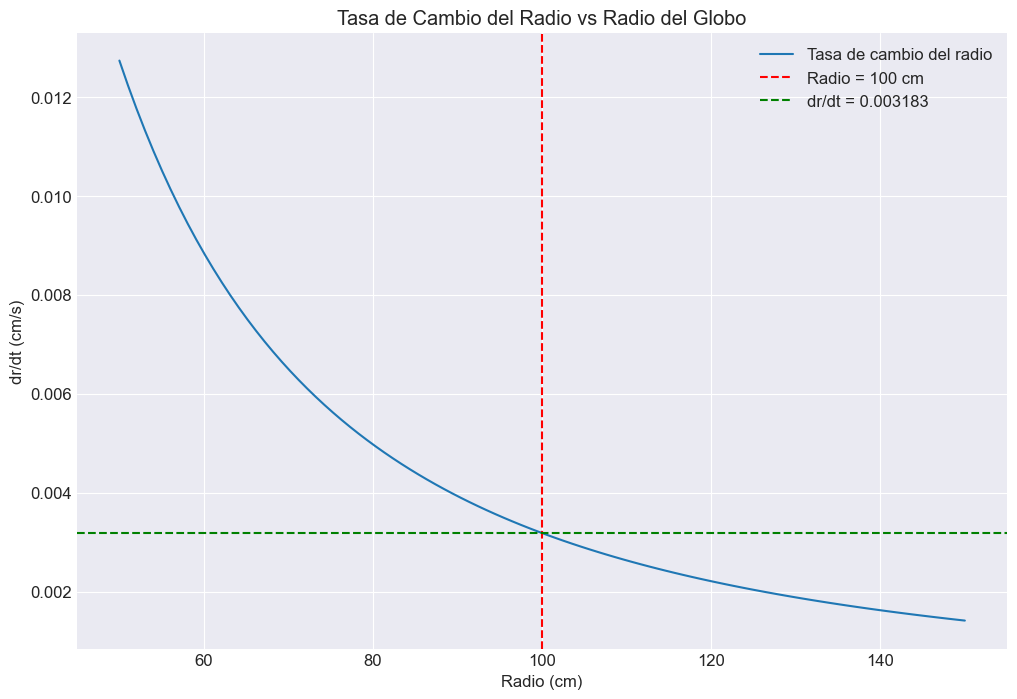

In [5]:
def balloon_problem():
    t = symbols('t')
    r = symbols('r', cls=sp.Function)(t)
    V = symbols('V', cls=sp.Function)(t)
    
    # Dados
    dVdt = 400  # cm³/s
    r_val = 100  # cm
    
    # Ecuación del volumen
    volume_eq = Eq(V, (4/3)*pi*r**3)
    
    # Diferenciación implícita (derivar ambos lados)
    diff_eq = Eq(diff(V, t), diff((4/3)*pi*r**3, t))
    
    # Sustituir valores conocidos
    subs_eq = diff_eq.subs({
        diff(V, t): dVdt,
        r: r_val,
        diff(r, t): symbols('dr/dt')
    })
    
    # Resolver para dr/dt
    drdt = solve(subs_eq, symbols('dr/dt'))[0]
    
    print("=== Problema del Globo ===")
    print(f"Ecuación original: {volume_eq}")
    print(f"Ecuación diferenciada: {diff_eq}")
    print(f"Sustitución: {subs_eq}")
    print(f"\nResultado: dr/dt = {drdt}")
    print(f"Interpretación: El radio aumenta a {float(drdt):.6f} cm/s cuando r = 100 cm")
    
    # Visualización
    r_vals = np.linspace(50, 150, 100)
    drdt_vals = dVdt / (4 * pi * r_vals**2)
    
    plt.figure()
    plt.plot(r_vals, drdt_vals, label='Tasa de cambio del radio')
    plt.axvline(x=100, color='r', linestyle='--', label='Radio = 100 cm')
    plt.axhline(y=float(drdt), color='g', linestyle='--', label=f'dr/dt = {float(drdt):.6f}')
    plt.title('Tasa de Cambio del Radio vs Radio del Globo')
    plt.xlabel('Radio (cm)')
    plt.ylabel('dr/dt (cm/s)')
    plt.legend()
    plt.grid(True)
    plt.show()

balloon_problem()

## 2. Problemas de Precio y Demanda

**Estrategia**: Dada una relación entre cantidad $q$ y precio $p$, diferenciar implícitamente respecto al tiempo $t$.

### Implementación con ejemplo económico


=== Problema de Precio ===
Ecuación original: Eq(q(t), -exp(2*p(t))/5)
Ecuación diferenciada: Eq(Derivative(q(t), t), -2*exp(2*p(t))*Derivative(p(t), t)/5)
Sustitución: Eq(14, -2*dp/dt*exp(4)/5)

Resultado: dp/dt = -35*exp(-4) ≈ -0.6410 $/semana
Interpretación: El precio disminuye a 0.64 $/semana


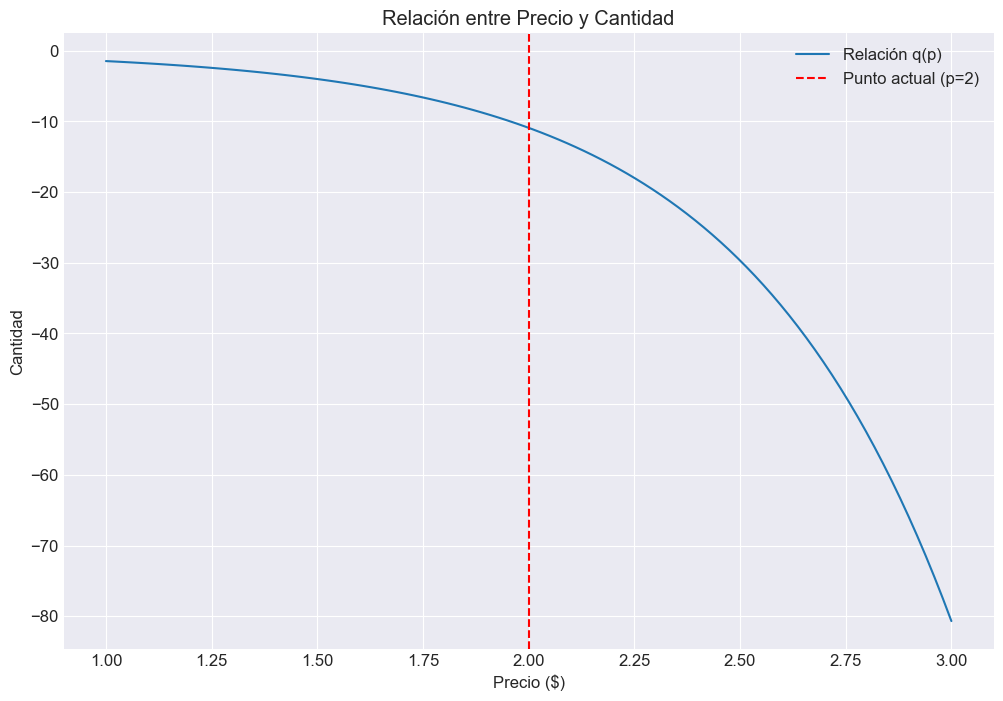

In [11]:
def price_problem():
    t = symbols('t')
    p = symbols('p', cls=sp.Function)(t)
    q = symbols('q', cls=sp.Function)(t)

    # Dados
    dqdt = 14  # unidades/semana
    p_val = 2  # dólares

    # Ecuación dada
    eq = Eq(q, -sp.Rational(1, 5)*sp.exp(2*p))  # type: ignore

    # Diferenciación implícita
    diff_eq = Eq(diff(q, t), diff(-sp.Rational(1, 5)
                 * sp.exp(2*p), t))  # type: ignore

    # Sustituir valores conocidos
    subs_eq = diff_eq.subs({
        diff(q, t): dqdt,
        p: p_val,
        diff(p, t): symbols('dp/dt')
    })

    # Resolver para dp/dt
    dpdt = solve(subs_eq, symbols('dp/dt'))[0]
    dpdt_eval = dpdt.evalf()

    print("\n=== Problema de Precio ===")
    print(f"Ecuación original: {eq}")
    print(f"Ecuación diferenciada: {diff_eq}")
    print(f"Sustitución: {subs_eq}")
    print(f"\nResultado: dp/dt = {dpdt} ≈ {dpdt_eval:.4f} $/semana")
    print(
        f"Interpretación: El precio disminuye a {abs(float(dpdt_eval)):.2f} $/semana")

    # Visualización del comportamiento
    p_vals = np.linspace(1, 3, 100)
    q_vals = [-1/5 * np.exp(2*p) for p in p_vals]

    plt.figure()
    plt.plot(p_vals, q_vals, label='Relación q(p)')
    plt.axvline(x=2, color='r', linestyle='--', label='Punto actual (p=2)')
    plt.title('Relación entre Precio y Cantidad')
    plt.xlabel('Precio ($)')
    plt.ylabel('Cantidad')
    plt.legend()
    plt.grid(True)
    plt.show()


price_problem()

## 3. Problemas de Nivel de Agua en Tanques

**Fórmulas clave**: Dependen de la forma del tanque (cilindro, cono, etc.).

### Implementación para tanque cónico


=== Problema de Tanque Cónico ===
Relación r(h): Eq(r(t), 0.533333333333333*h(t))
Ecuación volumen: Eq(V(t), 0.333333333333333*pi*h(t)*r(t)**2)
Ecuación sustituida: Eq(V(t), 0.0948148148148148*pi*h(t)**3)
Ecuación diferenciada: Eq(Derivative(V(t), t), 0.284444444444444*pi*h(t)**2*Derivative(h(t), t))

Resultado: dh/dt = 0.0155424749113179 ≈ 0.015542 m/min


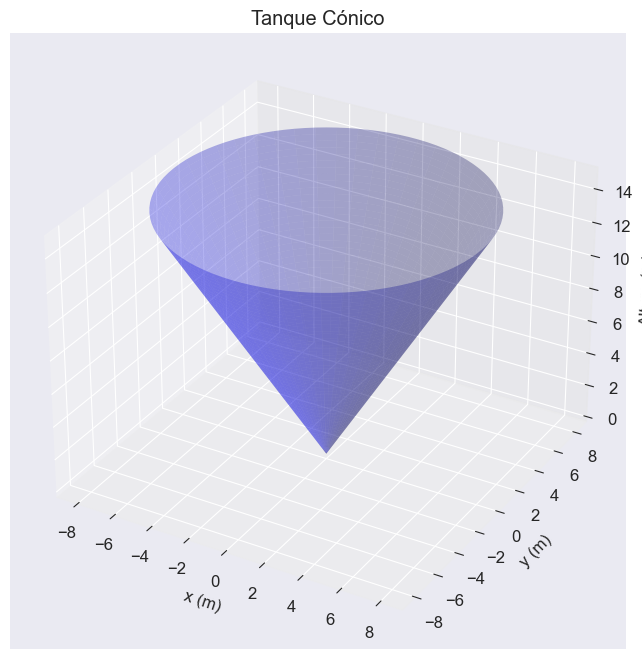

In [17]:
def water_tank_problem():
    t = symbols('t')
    h = symbols('h', cls=sp.Function)(t)
    r = symbols('r', cls=sp.Function)(t)
    V = symbols('V', cls=sp.Function)(t)
    
    # Dados
    dVdt = 2  # m³/min
    h_val = 12  # m
    R_tank = 8  # m
    H_tank = 15  # m
    
    # Relación entre r y h (triángulos semejantes)
    slope = R_tank / H_tank
    r_eq = Eq(r, slope * h)
    
    # Ecuación del volumen
    volume_eq = Eq(V, (1/3)*pi*r**2*h)
    
    # Sustituir r en términos de h
    volume_eq_sub = volume_eq.subs(r, slope*h)
    
    # Diferenciación implícita (derivar ambos lados)
    diff_eq = Eq(diff(volume_eq_sub.lhs, t), diff(volume_eq_sub.rhs, t)) # type: ignore
    
    # Sustituir valores conocidos
    subs_eq = diff_eq.subs({
        diff(V, t): dVdt,
        h: h_val,
        diff(h, t): symbols('dh/dt')
    })
    
    # Resolver para dh/dt
    dhdt = solve(subs_eq, symbols('dh/dt'))[0]
    dhdt_eval = dhdt.evalf()
    
    print("\n=== Problema de Tanque Cónico ===")
    print(f"Relación r(h): {r_eq}")
    print(f"Ecuación volumen: {volume_eq}")
    print(f"Ecuación sustituida: {volume_eq_sub}")
    print(f"Ecuación diferenciada: {diff_eq}")
    print(f"\nResultado: dh/dt = {dhdt} ≈ {dhdt_eval:.6f} m/min")
    
    # Visualización del tanque
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Parámetros del cono
    theta = np.linspace(0, 2*np.pi, 100)
    h_cone = np.linspace(0, H_tank, 50)
    theta_grid, h_grid = np.meshgrid(theta, h_cone)
    r_cone = (R_tank/H_tank) * h_cone
    x = np.outer(r_cone, np.cos(theta))
    y = np.outer(r_cone, np.sin(theta))
    z = np.outer(h_cone, np.ones_like(theta))
    
    ax.plot_surface(x, y, z, alpha=0.3, color='blue') # type: ignore
    ax.set_title('Tanque Cónico')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('Altura (m)') # type: ignore
    plt.show()

water_tank_problem()

## 4. Problemas de Observador y Movimiento Relativo

**Herramienta clave**: Teorema de Pitágoras $a^2 + b^2 = c^2$.

### Implementación para avión y observador


=== Problema de Observador ===
Ecuación original: Eq(a(t)**2 + b(t)**2, c(t)**2)
Ecuación diferenciada: Eq(2*a(t)*Derivative(a(t), t) + 2*b(t)*Derivative(b(t), t), 2*c(t)*Derivative(c(t), t))
Sustitución: Eq(-440, 4*sqrt(17)*dc/dt)

Resultado: dc/dt = -110*sqrt(17)/17 ≈ -26.68 km/h


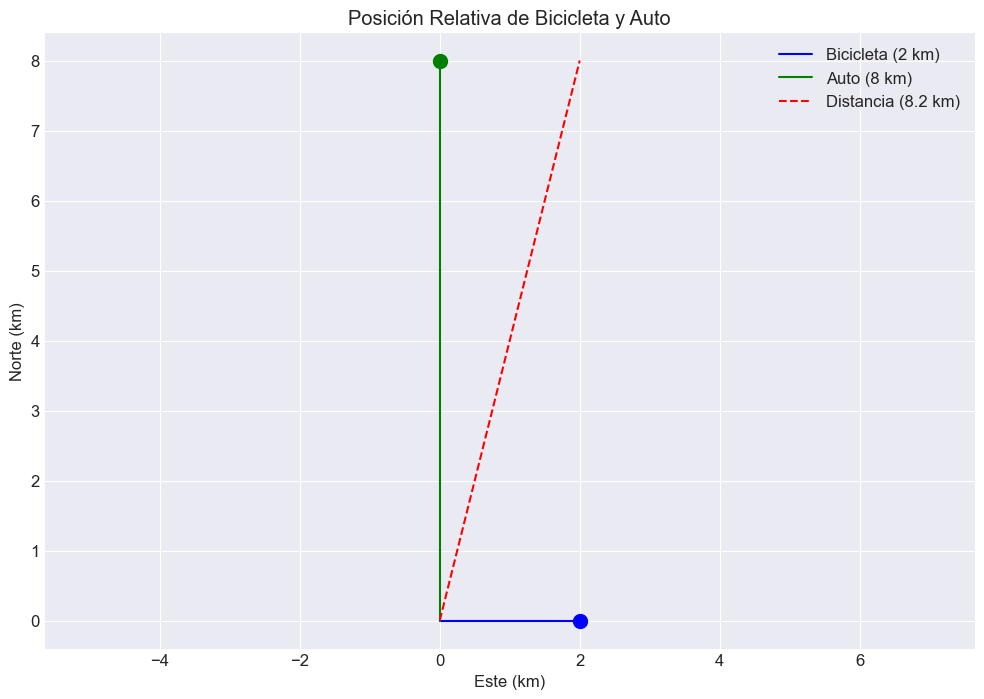

In [ ]:
def observer_problem():
    t = symbols('t')
    a = sp.Function('a')(t)
    b = sp.Function('b')(t)
    c = sp.Function('c')(t)
    
    # Dados
    a_val = 2  # km
    b_val = 8  # km
    dadt = -10  # km/h
    dbdt = -25  # km/h
    
    # Ecuación de Pitágoras
    pitagoras = Eq(a**2 + b**2, c**2) # type: ignore
    
    # Calcular c cuando a=2, b=8
    c_val = sqrt(a_val**2 + b_val**2)
    
    # Diferenciación implícita
    lhs_diff = diff(a**2 + b**2, t) # type: ignore
    rhs_diff = diff(c**2, t) # type: ignore
    diff_eq = Eq(lhs_diff, rhs_diff)
    
    # Sustituir valores conocidos
    subs_eq = diff_eq.subs({
        a: a_val,
        b: b_val,
        c: c_val,
        diff(a, t): dadt,
        diff(b, t): dbdt,
        diff(c, t): symbols('dc/dt')
    })
    
    # Resolver para dc/dt
    dcdt = solve(subs_eq, symbols('dc/dt'))[0]
    dcdt_eval = dcdt.evalf()
    
    print("\n=== Problema de Observador ===")
    print(f"Ecuación original: {pitagoras}")
    print(f"Ecuación diferenciada: {diff_eq}")
    print(f"Sustitución: {subs_eq}")
    print(f"\nResultado: dc/dt = {dcdt} ≈ {dcdt_eval:.2f} km/h")
    
    # Visualización del escenario
    plt.figure()
    plt.plot([0, a_val], [0, 0], 'b-', label='Bicicleta (2 km)')
    plt.plot([0, 0], [0, b_val], 'g-', label='Auto (8 km)')
    plt.plot([0, a_val], [0, b_val], 'r--', label=f'Distancia ({float(c_val):.1f} km)')
    plt.scatter([a_val], [0], color='blue', s=100)
    plt.scatter([0], [b_val], color='green', s=100)
    plt.title('Posición Relativa de Bicicleta y Auto')
    plt.xlabel('Este (km)')
    plt.ylabel('Norte (km)')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

observer_problem()

# Sección 15: Tasas Relacionadas - Problema de la Escalera Deslizante (Versión Mejorada)

## Análisis del Problema de la Escalera

El problema clásico de la escalera deslizante es un excelente ejemplo de tasas relacionadas que involucra:
- Geometría del triángulo rectángulo
- Conservación de la longitud de la escalera
- Relación entre las tasas de cambio de las variables

### Implementación Mejorada con Explicación Detallada


=== Paso 1: Relación Geométrica ===
Ecuación de Pitágoras: Eq(a(t)**2 + b(t)**2, 100)

=== Paso 2: Calcular valor actual de b ===
Cuando a = 5 ft, b = √(10² - 5²) = 8.660 ft

=== Paso 3: Diferenciación Implícita ===
Derivando ambos lados respecto a t:
d/dt(a² + b²) = d/dt(c²)
Obtenemos: Eq(2*a(t)*Derivative(a(t), t) + 2*b(t)*Derivative(b(t), t), 0)

Desarrollando las derivadas:
2a*(da/dt) + 2b*(db/dt) = 0 (ya que c es constante)

=== Paso 4: Sustitución de Valores ===
Sustituyendo: a = 5 ft, da/dt = -1 ft/s, b = 8.660 ft
Ecuación sustituida: Eq(10*sqrt(3)*db/dt - 10, 0)

=== Paso 5: Resolución para db/dt ===
Resultado: db/dt = sqrt(3)/3 ≈ 0.5774 ft/s

=== Interpretación Física ===
Cuando la parte superior está a 5 ft de altura y está cayendo a 1 ft/s,
la base se está alejando de la pared a 0.5774 ft/s


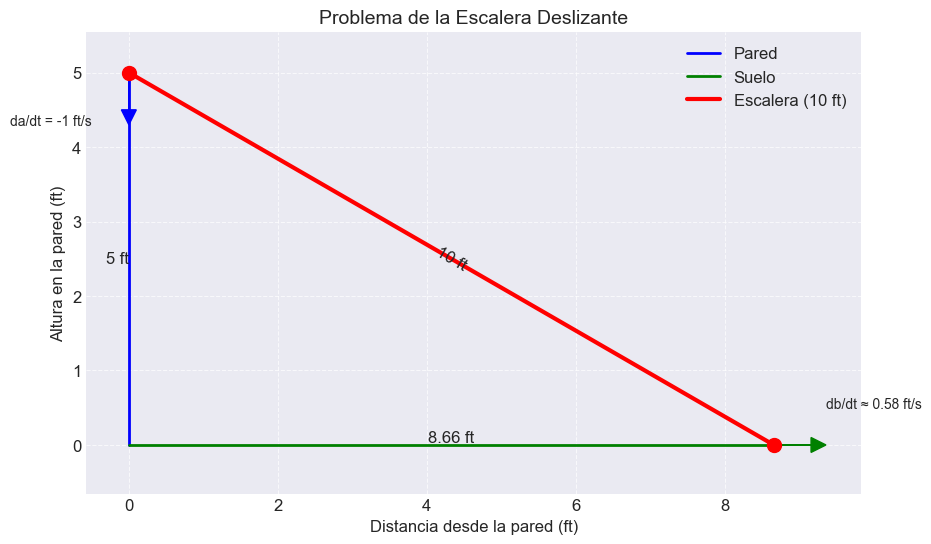

In [ ]:
def ladder_problem_enhanced():
    # Definición de variables y parámetros
    t = symbols('t')  # Variable tiempo
    a = symbols('a', cls=sp.Function)(t)  # Altura en la pared (función del tiempo)
    b = symbols('b', cls=sp.Function)(t)  # Distancia desde la pared (función del tiempo)
    c = 10  # Longitud constante de la escalera (ft)
    
    # Valores conocidos en el instante específico
    a_val = 5  # ft (altura cuando nos interesa calcular)
    dadt = -1  # ft/s (velocidad con que disminuye la altura)
    
    # Paso 1: Establecer la relación geométrica
    pitagoras = Eq(a**2 + b**2, c**2)
    print("\n=== Paso 1: Relación Geométrica ===")
    print(f"Ecuación de Pitágoras: {pitagoras}")
    
    # Paso 2: Calcular la distancia base en el instante dado
    b_val = sqrt(c**2 - a_val**2)
    print("\n=== Paso 2: Calcular valor actual de b ===")
    print(f"Cuando a = {a_val} ft, b = √({c}² - {a_val}²) = {b_val.evalf():.3f} ft")
    
    # Paso 3: Diferenciación implícita respecto al tiempo
    print("\n=== Paso 3: Diferenciación Implícita ===")
    print("Derivando ambos lados respecto a t:")
    print(f"d/dt(a² + b²) = d/dt(c²)")
    
    lhs_diff = diff(a**2, t) + diff(b**2, t) # type: ignore
    rhs_diff = diff(c**2, t)
    diff_eq = Eq(lhs_diff, rhs_diff)
    print(f"Obtenemos: {diff_eq}")
    
    # Desarrollando las derivadas
    print("\nDesarrollando las derivadas:")
    print(f"2a*(da/dt) + 2b*(db/dt) = 0 (ya que c es constante)")
    
    # Paso 4: Sustitución de valores conocidos
    print("\n=== Paso 4: Sustitución de Valores ===")
    print(f"Sustituyendo: a = {a_val} ft, da/dt = {dadt} ft/s, b = {b_val.evalf():.3f} ft")
    
    subs_eq = diff_eq.subs({
        a: a_val,
        b: b_val,
        diff(a, t): dadt,
        diff(b, t): symbols('db/dt')
    })
    print(f"Ecuación sustituida: {subs_eq}")
    
    # Paso 5: Resolución para db/dt
    print("\n=== Paso 5: Resolución para db/dt ===")
    dbdt = solve(subs_eq, symbols('db/dt'))[0]
    dbdt_eval = dbdt.evalf()
    print(f"Resultado: db/dt = {dbdt} ≈ {dbdt_eval:.4f} ft/s")
    
    # Interpretación física
    print("\n=== Interpretación Física ===")
    print(f"Cuando la parte superior está a {a_val} ft de altura y está cayendo a {abs(dadt)} ft/s,")
    print(f"la base se está alejando de la pared a {dbdt_eval:.4f} ft/s")
    
    # Visualización mejorada
    plt.figure(figsize=(10, 6))
    
    # Triángulo actual
    plt.plot([0, 0], [0, a_val], 'b-', linewidth=2, label='Pared')
    plt.plot([0, b_val], [0, 0], 'g-', linewidth=2, label='Suelo') # type: ignore
    plt.plot([0, b_val], [a_val, 0], 'r-', linewidth=3, label=f'Escalera ({c} ft)') # type: ignore
    
    # Puntos importantes
    plt.scatter([0], [a_val], color='red', s=100, zorder=5)
    plt.scatter([b_val], [0], color='red', s=100, zorder=5) # type: ignore
    
    # Anotaciones
    plt.text(0, a_val/2, f'{a_val} ft', ha='right', va='center', fontsize=12)
    plt.text(b_val/2, 0, f'{b_val.evalf():.2f} ft', ha='center', va='bottom', fontsize=12) # type: ignore
    plt.text(b_val/2, a_val/2, f'{c} ft', ha='center', va='center', rotation=-np.degrees(np.arctan(a_val/float(b_val.evalf()))), fontsize=12) # type: ignore
    
    # Flechas de movimiento
    plt.arrow(0, a_val, 0, -0.5, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    plt.text(-0.5, a_val-0.7, f'da/dt = {dadt} ft/s', ha='right', fontsize=10)
    
    plt.arrow(b_val, 0, 0.5, 0, head_width=0.2, head_length=0.2, fc='green', ec='green') # type: ignore
    plt.text(b_val+0.7, 0.5, f'db/dt ≈ {dbdt_eval:.2f} ft/s', ha='left', fontsize=10) # type: ignore
    
    plt.title('Problema de la Escalera Deslizante', fontsize=14)
    plt.xlabel('Distancia desde la pared (ft)', fontsize=12)
    plt.ylabel('Altura en la pared (ft)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')
    plt.show()

ladder_problem_enhanced()

## Explicación Teórica Detallada

### Conceptos Clave

1. **Relación Geométrica Constante**:
   $$a(t)^2 + b(t)^2 = c^2$$
   Donde $c$ es constante (longitud de la escalera).

2. **Diferenciación Implícita**:
   $$\frac{d}{dt}[a^2 + b^2] = \frac{d}{dt}[c^2]$$
   $$2a\frac{da}{dt} + 2b\frac{db}{dt} = 0$$

3. **Interpretación Física**:
   - $\frac{da}{dt}$: Tasa de cambio de la altura (negativa cuando disminuye)
   - $\frac{db}{dt}$: Tasa de cambio de la distancia base (positiva cuando aumenta)

### Proceso de Solución Paso a Paso

1. **Establecer la relación geométrica** usando el teorema de Pitágoras.

2. **Diferenciar implícitamente** respecto al tiempo, aplicando la regla de la cadena.

3. **Sustituir valores conocidos** en el instante específico de interés.

4. **Resolver para la tasa desconocida** ($\frac{db}{dt}$ en este caso).

5. **Interpretar el resultado** en contexto físico.

## Análisis de Sensibilidad

Podemos analizar cómo varía $\frac{db}{dt}$ para diferentes alturas $a$:

C:\Users\Mardu\AppData\Local\Temp\ipykernel_4840\4076230561.py:7: RuntimeWarning: divide by zero encountered in divide
  dbdt_values = -a_values*dadt/b_values


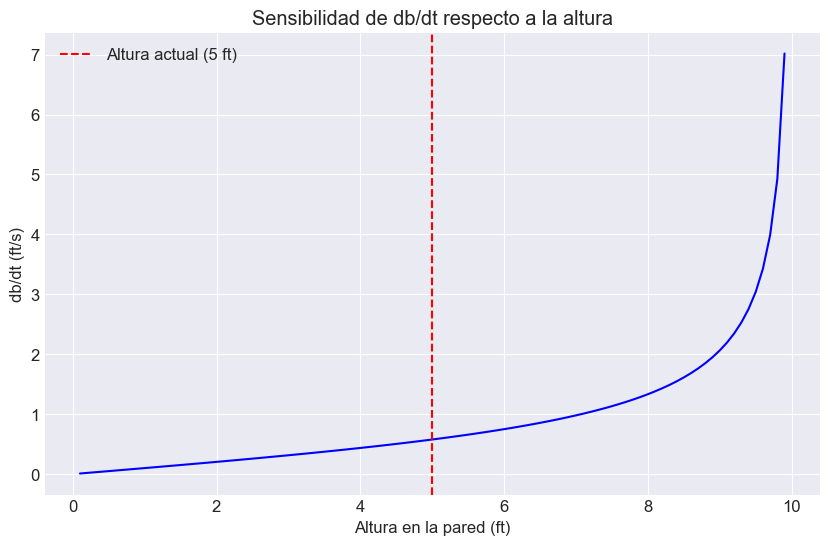

In [9]:
def sensitivity_analysis():
    c = 10  # Longitud fija de la escalera
    dadt = -1  # Velocidad fija de caída
    
    a_values = np.linspace(0.1, 10, 100)  # Alturas posibles
    b_values = np.sqrt(c**2 - a_values**2)
    dbdt_values = -a_values*dadt/b_values
    
    plt.figure(figsize=(10, 6))
    plt.plot(a_values, dbdt_values, 'b-')
    plt.axvline(x=5, color='r', linestyle='--', label='Altura actual (5 ft)')
    plt.title('Sensibilidad de db/dt respecto a la altura')
    plt.xlabel('Altura en la pared (ft)')
    plt.ylabel('db/dt (ft/s)')
    plt.grid(True)
    plt.legend()
    plt.show()

sensitivity_analysis()

## Resumen Teórico Completo

| **Tipo de Problema**       | **Ecuación Clave**                          | **Proceso de Solución**                          |
|----------------------------|---------------------------------------------|--------------------------------------------------|
| **Globo esférico**         | $V = \frac{4}{3}\pi r^3$                   | 1. Diferenciar respecto a $t$<br>2. Sustituir valores conocidos<br>3. Resolver para la tasa desconocida |
| **Precio y demanda**       | $q = f(p)$                                  | 1. Diferenciar implícitamente<br>2. Relacionar $dq/dt$ y $dp/dt$<br>3. Evaluar en punto dado |
| **Nivel de agua (cono)**   | $V = \frac{1}{3}\pi r^2 h$                 | 1. Expresar $r$ en términos de $h$<br>2. Diferenciar respecto a $t$<br>3. Resolver para $dh/dt$ |
| **Movimiento relativo**    | $a^2 + b^2 = c^2$                          | 1. Aplicar Pitágoras<br>2. Diferenciar respecto a $t$<br>3. Resolver para $dc/dt$ |
| **Escalera deslizante**    | $a^2 + b^2 = \text{constante}$             | 1. Usar longitud constante<br>2. Diferenciar respecto a $t$<br>3. Resolver para tasa desconocida |
